# Exercise 04

Estimate a regression using the Capital Bikeshare data


## Forecast use of a city bikeshare system

We'll be working with a dataset from Capital Bikeshare that was used in a Kaggle competition ([data dictionary](https://www.kaggle.com/c/bike-sharing-demand/data)).

Get started on this competition through Kaggle Scripts

Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

The data generated by these systems makes them attractive for researchers because the duration of travel, departure location, arrival location, and time elapsed is explicitly recorded. Bike sharing systems therefore function as a sensor network, which can be used for studying mobility in a city. In this competition, participants are asked to combine historical usage patterns with weather data in order to forecast bike rental demand in the Capital Bikeshare program in Washington, D.C.

In [6]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/bikeshare.csv'
bikes = pd.read_csv(url, index_col='datetime', parse_dates=True)

# "count" is a method, so it's best to name that column something else
bikes.rename(columns={'count':'total'}, inplace=True)

bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0,0,1,1


* datetime - hourly date + timestamp  
* season -  
  *  1 = spring
  * 2 = summer 
  * 3 = fall 
  * 4 = winter 
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather - 
  * 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
  * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
  * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
  * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
*  temp - temperature in Celsius
*  atemp - "feels like" temperature in Celsius
*  humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* total - number of total rentals

In [7]:
bikes.shape

(10886, 11)

# Exercise 4.1 

What is the relation between the temperature and total?

For a one percent increase in temperature how much the bikes shares increases?

Using sklearn estimate a linear regression and predict the total bikes share when the temperature is 31 degrees 

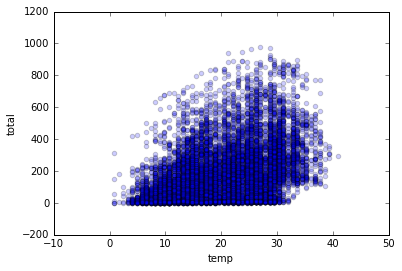

In [8]:
# Pandas scatter plot
bikes.plot(kind='scatter', x='temp', y='total', alpha=0.2)

In [1]:
# Solution here

# Exercise 04.2

Evaluate the model using the MSE

In [1]:
# Solution here

# Exercise 04.3

Does the scale of the features matter?

Let's say that temperature was measured in Fahrenheit, rather than Celsius. How would that affect the model?

In [1]:
# Solution here


# Exercise 04.4

Run a regression model using as features the temperature and temperature$^2$ using the OLS equations

In [1]:
# Solution here

# Exercise 04.5

Data visualization.

What behavior is unexpected?

In [21]:
# explore more features
feature_cols = ['temp', 'season', 'weather', 'humidity']

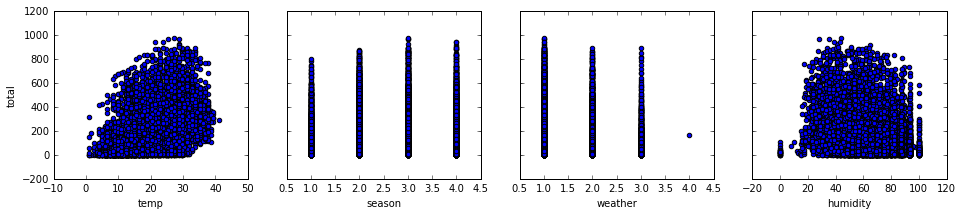

In [22]:
# multiple scatter plots in Pandas
fig, axs = plt.subplots(1, len(feature_cols), sharey=True)
for index, feature in enumerate(feature_cols):
    bikes.plot(kind='scatter', x=feature, y='total', ax=axs[index], figsize=(16, 3))

Are you seeing anything that you did not expect?

 seasons: 
  *  1 = spring
  * 2 = summer 
  * 3 = fall 
  * 4 = winter 

In [23]:
# pivot table of season and month
month = bikes.index.month
pd.pivot_table(bikes, index='season', columns=month, values='temp', aggfunc=np.count_nonzero).fillna(0)

,1,2,3,4,5,6,7,8,9,10,11,12
season,,,,,,,,,,,,
1,884,901,901,0,0,0,0,0,0,0,0,0
2,0,0,0,909,912,912,0,0,0,0,0,0
3,0,0,0,0,0,0,912,912,909,0,0,0
4,0,0,0,0,0,0,0,0,0,911,911,912


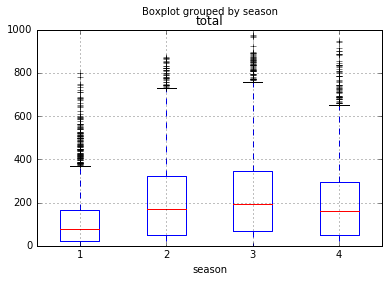

In [24]:
# box plot of rentals, grouped by season
bikes.boxplot(column='total', by='season')

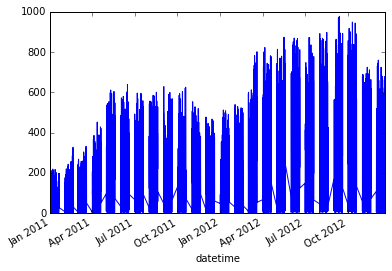

In [25]:
# line plot of rentals
bikes.total.plot()

### Solution here

# Exercise 04.6

Estimate a regression using more features ['temp', 'season', 'weather', 'humidity'].

How is the performance compared to using only the temperature?

In [1]:
# Solution here

# Exercise 04.7 (3 points)

Split randomly the data in train and test

Which of the following models is the best in the testing set?
* ['temp', 'season', 'weather', 'humidity']
* ['temp', 'season', 'weather']
* ['temp', 'season', 'humidity']


In [1]:
# Solution here